In [ ]:
%tensorflow_version 2.3.x
import tensorflow as tf

from google.colab import drive
drive.mount('/content/drive')


`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.3.x`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.
Mounted at /content/drive


In [ ]:
model = tf.keras.models.load_model('/content/drive/My Drive/protobufferv1/')


In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
______________________________________________________________________________________________

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt


diseases = np.array(["Actinic Keratoses", "Carcinoma", 
                     "Benign Keratosis", "Dermatofibroma", 
                     "Melanoma", "Melanocytic Nevi", 
                     "Vascular Lesions"])
IMG_HEIGHT = 224
IMG_WIDTH = 224

def classify(imageDir, height, width):
  img = Image.open(imageDir)
  img = img.resize((IMG_HEIGHT, IMG_WIDTH))
  img = np.array(img)
  img = img / 255.0
  img = img.reshape(1, IMG_HEIGHT, IMG_WIDTH, 3)
  return model.predict(img)

def plotGraph(diseaseList, predictionArray):
  fig = plt.figure(figsize=(10, 4))
  ax = fig.add_axes([0,0,1,1])
  ax.bar(diseaseList,predictionArray)
  plt.savefig('prediction.png', dpi=200, bbox_inches = 'tight')
  plt.draw()
  plt.show()

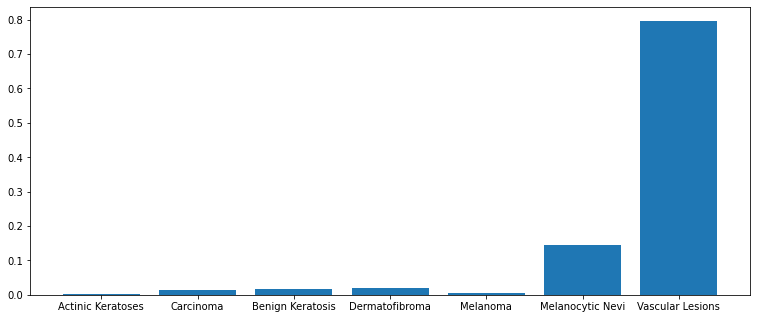

In [ ]:
prediction = classify('/content/drive/My Drive/TestImage/vasc.jpg', IMG_HEIGHT, IMG_WIDTH)
plotGraph(diseases, prediction[0])

References:


*   https://stackoverflow.com/questions/50128278/how-to-import-a-trained-model-to-predict-a-single-image


